<a href="https://colab.research.google.com/github/Sergio-Tolaba/25_matplotlib/blob/main/visualizacion_de_datos_con_python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos con Python: Matplotlib, Seaborn y Plotly

In [1]:
import pandas as pd
df = pd.read_csv('/content/inmigrantes_canada.csv')
df.head()

,Pais,Continente,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argelia,África,Norte de África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [2]:
df.shape # (195, 38)

(195, 38)

In [3]:
df.info() # No hay datos nulos, hay 3 objects (str) y los años 33 int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pais        195 non-null    object
 1   Continente  195 non-null    object
 2   Region      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [4]:
# Nuevo df con índice = Pais // Para evitar poner una variable, hago la modificación en el mismo df usando inplace=True
df.set_index('Pais', inplace=True)
df.head()


,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argelia,África,Norte de África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [5]:
# Nuevo df que contenga los inmigrantes colombianos
# 1. Obtener una lista de los años donde cada año es un str
anio = list(map(str, range(1980, 2014)))
print(anio)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [6]:
# 2. Crear una panda_series que contenga los años y la cantidad de inmigrantes colombianos
colombia = df.loc['Colombia', anio]
print(colombia)

1980     266
1981     326
1982     360
1983     244
1984     235
1985     214
1986     257
1987     376
1988     352
1989     439
1990     614
1991     652
1992     582
1993     464
1994     375
1995     371
1996     381
1997     578
1998     929
1999    1306
2000    2259
2001    2965
2002    3283
2003    4318
2004    4566
2005    6424
2006    6535
2007    5357
2008    5452
2009    4652
2010    5218
2011    4366
2012    3741
2013    3631
Name: Colombia, dtype: object


In [7]:
# Crear un df con el pandaseries. Hay varios caminos, elegimos hacer 1ero un diccionario
diccionario = {'Año': colombia.index.tolist(), 'Cantidad': colombia.values.tolist()}
print(diccionario)
df_colombia = pd.DataFrame(diccionario)
df_colombia.head()

{'Año': ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'], 'Cantidad': [np.int64(266), np.int64(326), np.int64(360), np.int64(244), np.int64(235), np.int64(214), np.int64(257), np.int64(376), np.int64(352), np.int64(439), np.int64(614), np.int64(652), np.int64(582), np.int64(464), np.int64(375), np.int64(371), np.int64(381), np.int64(578), np.int64(929), np.int64(1306), np.int64(2259), np.int64(2965), np.int64(3283), np.int64(4318), np.int64(4566), np.int64(6424), np.int64(6535), np.int64(5357), np.int64(5452), np.int64(4652), np.int64(5218), np.int64(4366), np.int64(3741), np.int64(3631)]}


,Año,Cantidad
0,1980,266
1,1981,326
2,1982,360
3,1983,244
4,1984,235


In [8]:
import matplotlib.pyplot as plt

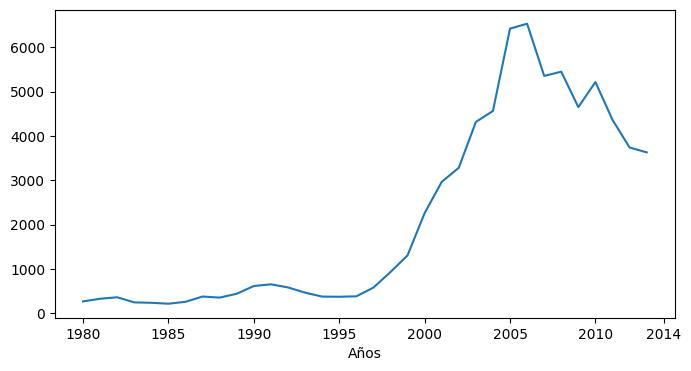

In [9]:
# Podemos ajustar el tamaño de la figura Ej de 8 pulgadas de ancho por 4 pulgadas de alto
plt.figure(figsize=(8, 4))
plt.plot(df_colombia['Año'], df_colombia['Cantidad'])
plt.xticks(['1980', '1985','1990', '1995', '2000', '2005', '2010', '2014']) # Cada 5 años un año, para que no queden amontonados los años en el eje x
plt.xlabel('Años')
plt.show()


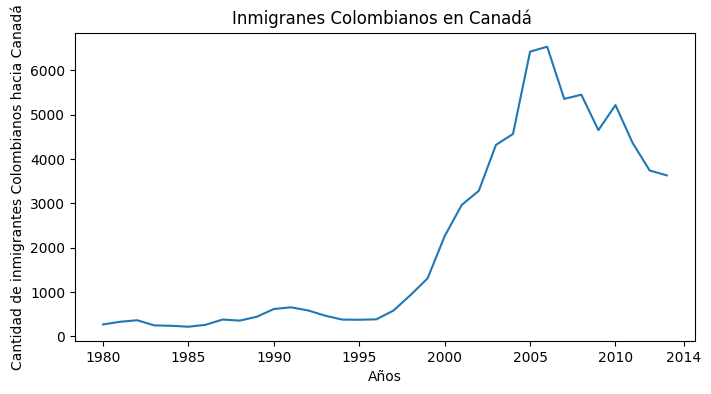

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(df_colombia['Año'], df_colombia['Cantidad'])
plt.xticks(['1980', '1985','1990', '1995', '2000', '2005', '2010', '2014'])
plt.title('Inmigranes Colombianos en Canadá ')
plt.xlabel('Años')
plt.ylabel('Cantidad de inmigrantes Colombianos hacia Canadá')
plt.show() # va a lo último para que funcione


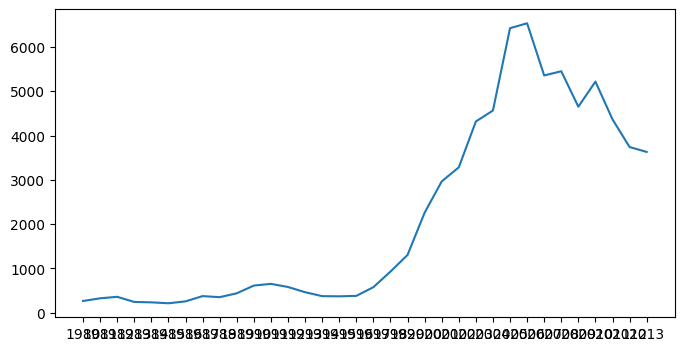

In [11]:
# Guardamos el lienzo(fig) y la gráfica(ax) // .subplots() => permite agregar varios gráficos en la misma ejecución
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df_colombia['Año'], df_colombia['Cantidad'])
plt.show()

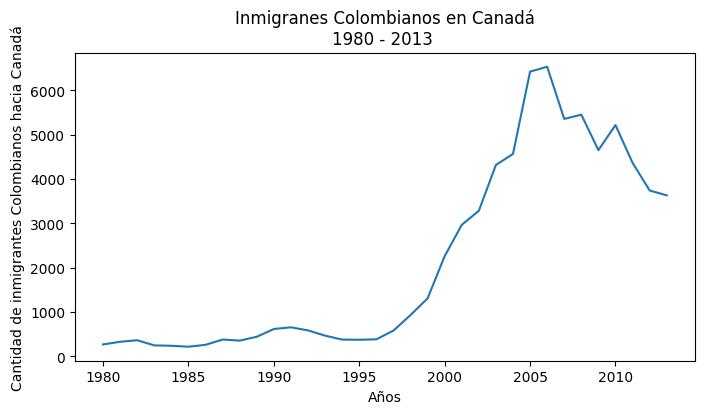

In [12]:
# Volvimos al gráfico inicial, x todo amontonado. Hay una función que permite resolver esto
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df_colombia['Año'], df_colombia['Cantidad'])
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Cada 5 años un año, para que no queden amontonados los años en el eje x
ax.set_title('Inmigranes Colombianos en Canadá\n1980 - 2013 ')
ax.set_xlabel('Años')
ax.set_ylabel('Cantidad de inmigrantes Colombianos hacia Canadá')
plt.show()

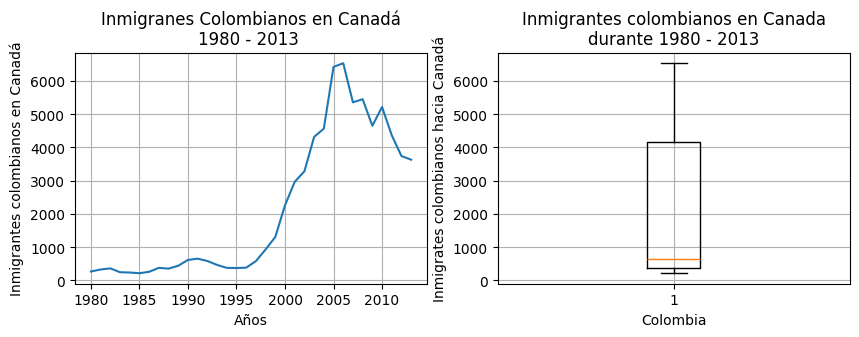

In [13]:
# Partiendo de cero y con la idea de generar 2 graficos juntos decimos:
# El gráfico de línea y el diagrama de caja o boxplot
fig, axs = plt.subplots(1,2,figsize=(10, 3)) # 1,2 indica una fila y 2 columnas para los gráficos

axs[0].plot(df_colombia['Año'], df_colombia['Cantidad'])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].set_title('Inmigranes Colombianos en Canadá\n1980 - 2013 ')
axs[0].set_xlabel('Años')
axs[0].set_ylabel('Inmigrantes colombianos en Canadá')
axs[0].grid()
# gráfico boxplot (datos estadísticos: 1er cuartil o  25% del período de 33 años,..50%, 75%=>caja) Min y Max
# 50% 2do cuartil o mediana: todos los datos ordenados y se ubica el dato de la mitad (!= del promedio)

axs[1].boxplot(df_colombia['Cantidad'])
axs[1].set_title('Inmigrantes colombianos en Canada\ndurante 1980 - 2013')
axs[1].set_xlabel('Colombia')
axs[1].set_ylabel('Inmigrates colombianos hacia Canadá')
axs[1].grid()
plt.show()


In [14]:
# Verifico los datos del Boxplot
df_colombia.describe()

,Cantidad
count,34.000000
mean,2120.235294
std,2163.761316
min,214.000000
25%,372.000000
50%,633.000000
75%,4173.750000
max,6535.000000


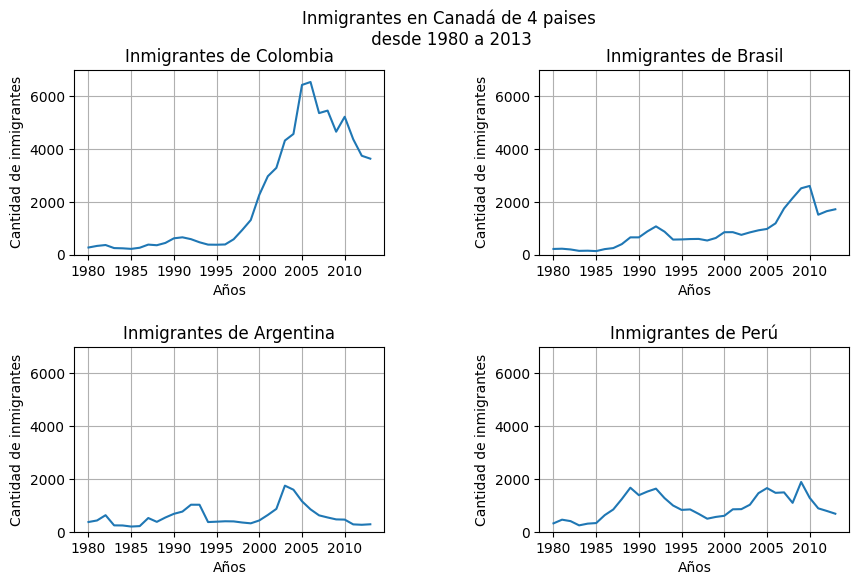

In [15]:
fig, axs = plt.subplots(2,2,figsize=(10, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Inmigrantes en Canadá de 4 paises\n desde 1980 a 2013')

axs[0,0].plot(df.loc['Colombia', anio])
axs[0,0].set_title('Inmigrantes de Colombia')


axs[0,1].plot(df.loc['Brasil', anio])
axs[0,1].set_title('Inmigrantes de Brasil')


axs[1,0].plot(df.loc['Argentina', anio])
axs[1,0].set_title('Inmigrantes de Argentina')


axs[1,1].plot(df.loc['Perú', anio])
axs[1,1].set_title('Inmigrantes de Perú')


y_min = 0
y_max = 7000

for ax in axs.flat:
  ax.set_ylim(y_min, y_max)


for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  ax.set_xlabel('Años')
  ax.set_ylabel('Cantidad de inmigrantes')
  ax.grid()
plt.show()

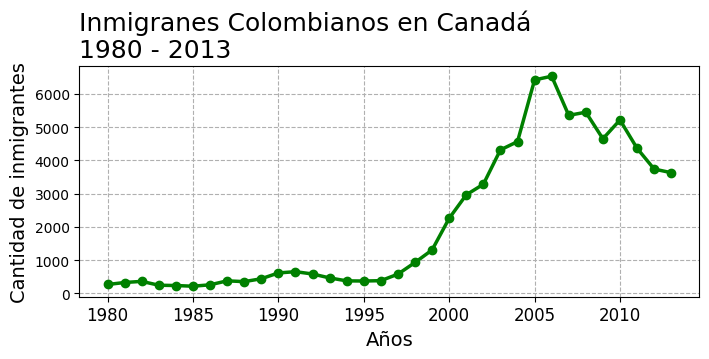

In [16]:
# Agregando distinto tamaño de fuentes a title, Años, Cantidad inmigrantes
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(df_colombia['Año'], df_colombia['Cantidad'], lw=2.5, marker='o', color='g')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Cada 5 años un año, para que no queden amontonados los años en el eje x
ax.set_title('Inmigranes Colombianos en Canadá\n1980 - 2013 ', fontsize=18, loc='left') # agranda el título
ax.set_xlabel('Años', fontsize=14)
ax.set_ylabel('Cantidad de inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12) # agranda la letra de los años, eje x
ax.yaxis.set_tick_params(labelsize=10) # achico números eje y
ax.grid(linestyle='--')
plt.show()

In [17]:
# Nuevo df sudamerica con los totales de inmigrantes para este período de 33 años
# df_sudamerica = df.loc[['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Perú', 'Uruguay', 'Venezuela'], anio]
# df_sudamerica.head()
sudamerica = df.query('Region == "América del Sur"')
sudamerica.head(10)

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina y el Caribe,América del Sur,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia,América Latina y el Caribe,América del Sur,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina y el Caribe,América del Sur,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina y el Caribe,América del Sur,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colombia,América Latina y el Caribe,América del Sur,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Ecuador,América Latina y el Caribe,América del Sur,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guyana,América Latina y el Caribe,América del Sur,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguay,América Latina y el Caribe,América del Sur,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Perú,América Latina y el Caribe,América del Sur,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


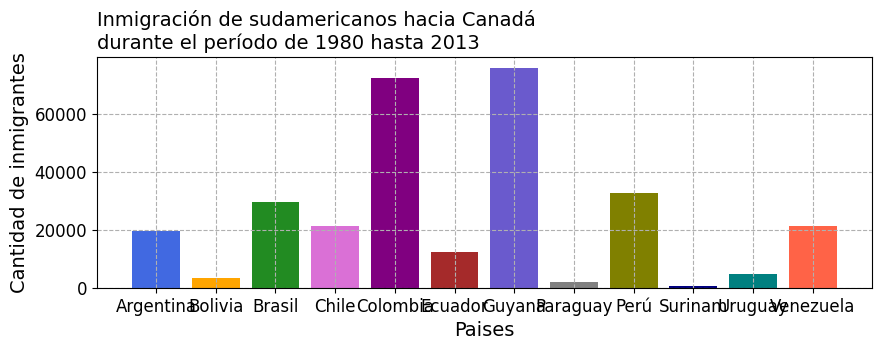

In [18]:
# Profesor generó 11 colores que contrastan muy bien con los gráficos
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive',
           'navy','teal', 'tomato']
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(sudamerica.index, sudamerica['Total'], color=colores)
ax.set_title('Inmigración de sudamericanos hacia Canadá\ndurante el período de 1980 hasta 2013',loc='left', fontsize=14)
ax.set_xlabel('Paises', fontsize=14)
ax.set_ylabel('Cantidad de inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(linestyle='--')
plt.show()

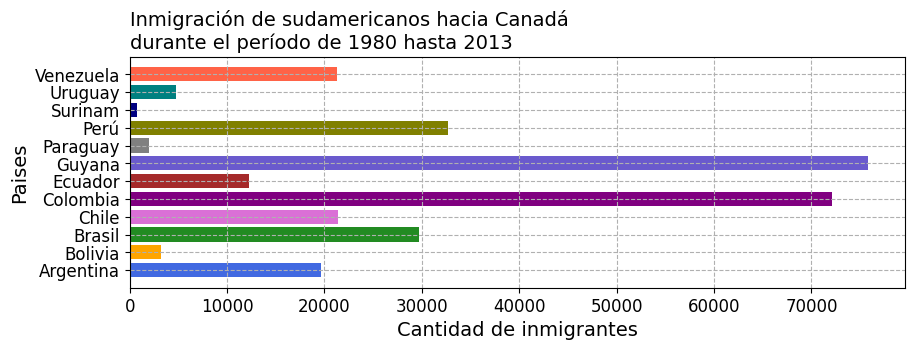

In [19]:
# Mejorando el gráfico con barras horizontales(ax.barh), luego invierto los ejes
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive',
           'navy','teal', 'tomato']
fig, ax = plt.subplots(figsize=(10, 3))
ax.barh(sudamerica.index, sudamerica['Total'], color=colores)
ax.set_title('Inmigración de sudamericanos hacia Canadá\ndurante el período de 1980 hasta 2013',loc='left', fontsize=14)
ax.set_ylabel('Paises', fontsize=14)
ax.set_xlabel('Cantidad de inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(linestyle='--')
plt.show()

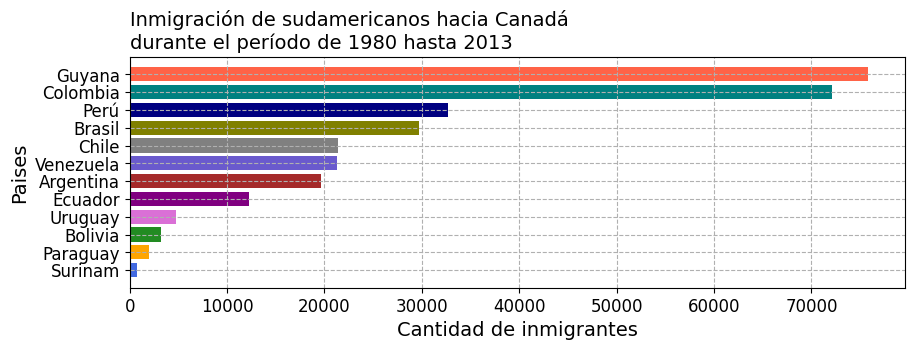

In [20]:
sudamerica_sort = sudamerica.sort_values('Total', ascending=True)

colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive',
           'navy','teal', 'tomato']
fig, ax = plt.subplots(figsize=(10, 3))
ax.barh(sudamerica_sort.index, sudamerica_sort['Total'], color=colores)
ax.set_title('Inmigración de sudamericanos hacia Canadá\ndurante el período de 1980 hasta 2013',loc='left', fontsize=14)
ax.set_ylabel('Paises', fontsize=14)
ax.set_xlabel('Cantidad de inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(linestyle='--')
plt.show()

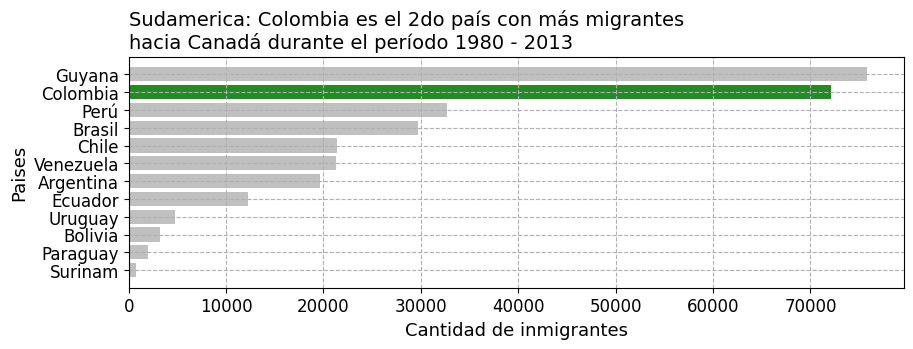

In [21]:
# Destacaremos en el Grafico a Colmbia
colores =[]
for pais in sudamerica_sort.index:
  if pais == 'Colombia':
    colores.append('forestgreen')
  else:
    colores.append('silver')

fig, ax = plt.subplots(figsize=(10, 3))
ax.barh(sudamerica_sort.index, sudamerica_sort['Total'], color=colores)
ax.set_title('Sudamerica: Colombia es el 2do país con más migrantes\nhacia Canadá durante el período 1980 - 2013',loc='left', fontsize=14)
ax.set_ylabel('Paises', fontsize=13)
ax.set_xlabel('Cantidad de inmigrantes', fontsize=13)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(linestyle='--')
plt.show()

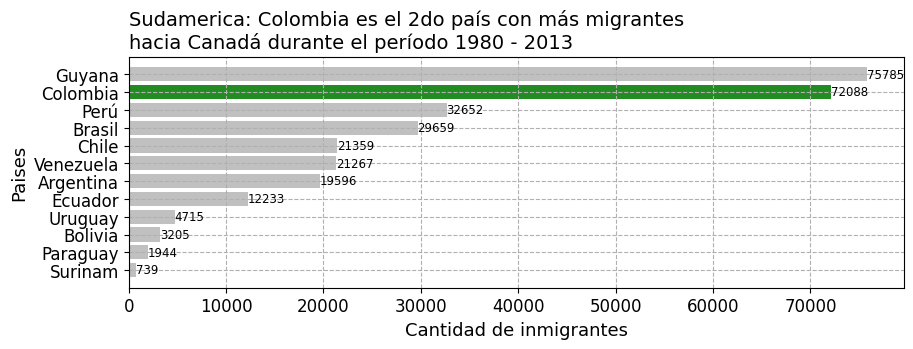

In [22]:
colores =[]
for pais in sudamerica_sort.index:
  if pais == 'Colombia':
    colores.append('forestgreen')
  else:
    colores.append('silver')

fig, ax = plt.subplots(figsize=(10, 3))
ax.barh(sudamerica_sort.index, sudamerica_sort['Total'], color=colores)
ax.set_title('Sudamerica: Colombia es el 2do país con más migrantes\nhacia Canadá durante el período 1980 - 2013',loc='left', fontsize=14)
ax.set_ylabel('Paises', fontsize=13)
ax.set_xlabel('Cantidad de inmigrantes', fontsize=13)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(linestyle='--')

for i,j in enumerate(sudamerica_sort['Total']):
  ax.text(j, i, str(j), va='center', ha='left', color='black', fontsize=8.5)

plt.show()
plt.show()

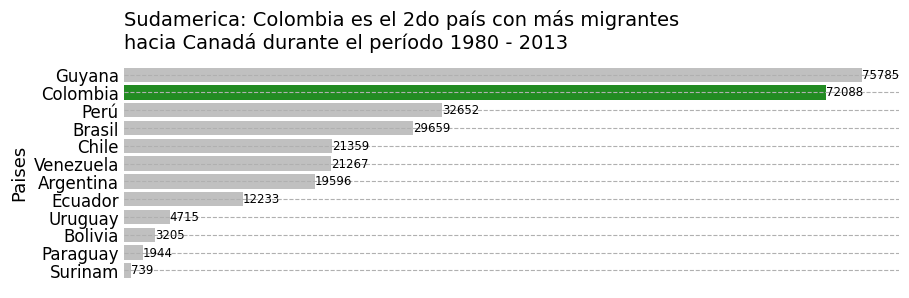

In [23]:
colores =[]
for pais in sudamerica_sort.index:
  if pais == 'Colombia':
    colores.append('forestgreen')
  else:
    colores.append('silver')

fig, ax = plt.subplots(figsize=(10, 3))
#----------------- Alivianamos la carga redundante del gráfico y quitamos el recuadro (frame) + eje x + tick del eje y
ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='y', which='both', size=0)
#----------------


#--------------
ax.barh(sudamerica_sort.index, sudamerica_sort['Total'], color=colores)
ax.set_title('Sudamerica: Colombia es el 2do país con más migrantes\nhacia Canadá durante el período 1980 - 2013',loc='left', fontsize=14)
ax.set_ylabel('Paises', fontsize=13)
ax.set_xlabel('Cantidad de inmigrantes', fontsize=13)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(linestyle='--')

for i,j in enumerate(sudamerica_sort['Total']):
  ax.text(j, i, str(j), va='center', ha='left', color='black', fontsize=8.5)

fig.savefig('/content/inmigrantes_sudamericanos_canada.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

 ## 08 Exportando gráficos

In [24]:
# Cómo guardamos este gráfico para adosarlo en una presentación?
# Primero veremos en qué formato de archivo se puede grabar el gráfico
print(fig.canvas.get_supported_filetypes())
# Elegimos este: 'png': 'Portable Network Graphics'

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


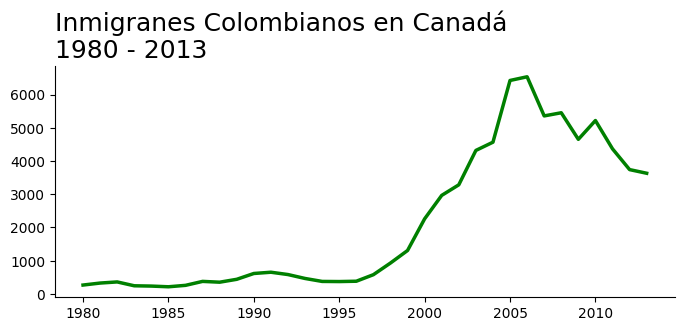

In [25]:
# 1er gráfico el de Inmigranes colombianos hacia Canadá - lo copio y hago algunos retoques y finalmente grabo el archivo.png
# Agregando distinto tamaño de fuentes a title, Años, Cantidad inmigrantes
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(df_colombia['Año'], df_colombia['Cantidad'], lw=2.5, color='g')#marker='o',
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Cada 5 años un año, para que no queden amontonados los años en el eje x
ax.set_title('Inmigranes Colombianos en Canadá\n1980 - 2013 ', fontsize=18, loc='left') # agranda el título
#-----Retoques
ax.set_xlabel('')
# ax.set_ylabel('Cantidad de inmigrantes', fontsize=14)
# ax.xaxis.set_tick_params(labelsize=12) # agranda la letra de los años, eje x
ax.yaxis.set_tick_params(labelsize=10) # achico números eje y
#ax.grid(linestyle='--')
#------Elimino el borde superior del frame y el borde derecho del frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ---------- Grabo el archivo donde dpi es la resolución, bbox_inches= apretado para que no quede ningún margen y tampoco queremos transparencia
fig.savefig('/content/inmigrantes_colombianos_canada.png', dpi=300, bbox_inches='tight', transparent=False)


plt.show()


## 02 Creando el primer gráfico con Seaborn (nacido en el mar)

In [26]:
import seaborn as sns

In [27]:
sns.set_theme() # A partir de aquí todas las gráficas tendran un mismo tema(grisáceo por defecto). Luego lo modificaremos.

In [28]:
# Nos piden los datos históricos de inmigrantes en Canadá. Crearemos un df llamado top_10 que tendrá todos los países
top_10 = df.sort_values('Total', ascending=False).head(10)
top_10 # Acá figuran los 10 países con los mayores Totales de inmigrantes que llegaron a Canadá en los 33 años analizados


,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
India,Asia,Sur de Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Asia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido,Europa,Norte de Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Asia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistán,Asia,Sur de Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos,América del Norte,América del Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irán,Asia,Sur de Asia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Sur de Asia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Corea del Sur,Asia,Asia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


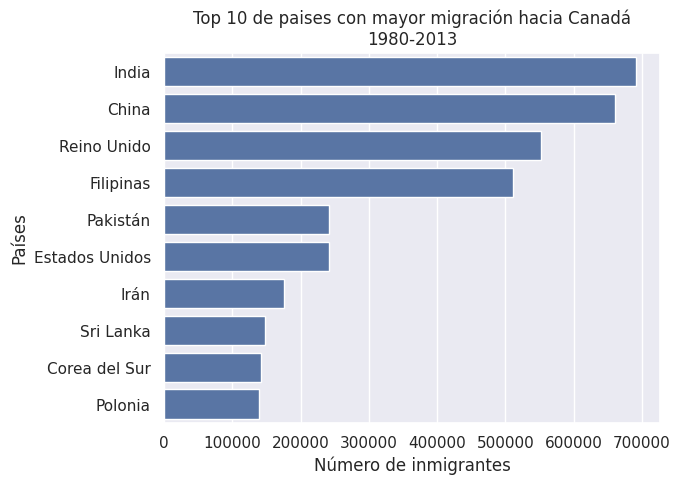

In [29]:
# Cambia la sintaxis en Seaborn respecto a Matplotlib
ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h')
ax.set(title='Top 10 de paises con mayor migración hacia Canadá\n1980-2013',
       xlabel='Número de inmigrantes',
       ylabel='Países')
plt.show() # Seaborn está construida en base a Matplotlib (plt)

## 03 Personalizando las visualizaciones con Seaborn

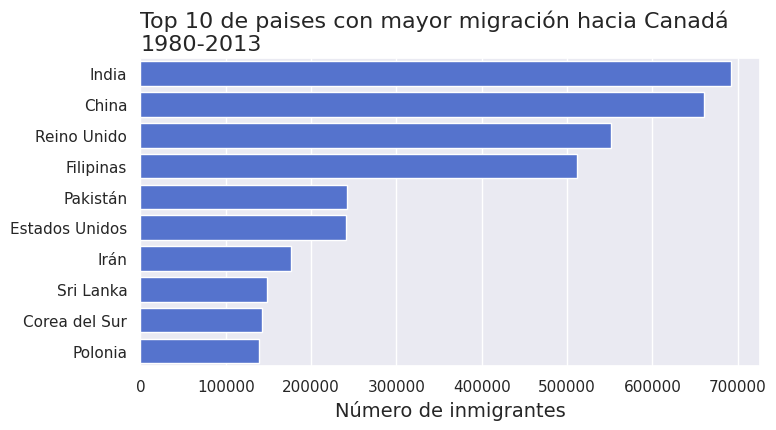

In [30]:
# Como hay una relación con plt, usaremos la sintaxis de plt con los agregados de Seaborn
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h', color='royalblue')
ax.set_title('Top 10 de paises con mayor migración hacia Canadá\n1980-2013',
       loc='left', fontsize=16)
ax.set_xlabel('Número de inmigrantes', fontsize=14)
#ax.set_ylabel('Países', fontsize=14)
ax.set_ylabel('')
plt.show()

##  05 Utilizando diversas palettes

In [31]:
# Copiamos el código anterior y definimos una función para probar distintas paletas de colores y decidir cuál queda mejor
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8, 4))
  #--mejorando la gráfica
  ax.set_frame_on(False)
  ax.xaxis.set_visible(False)
  ax.tick_params(axis='y', which='both', size=0)

  ax.xaxis.set_visible(False)
  ax.tick_params(axis='y', which='both', size=0)
  ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h',
                   palette=palette, legend=False) # se agregó esta línea
  ax.set_title('Top 10 de paises con mayor migración hacia Canadá\n1980-2013',
        loc='left', fontsize=16)
  ax.set_xlabel('Número de inmigrantes', fontsize=14)
  #ax.set_ylabel('Países', fontsize=14)
  ax.set_ylabel('')
  #----Se muestra en cada barra el valor total exacto de cada país
  for i,j in enumerate(top_10['Total']):
    ax.text(j, i, str(j), va='center', ha='left', color='black', fontsize=9)
  plt.show()

<ipython-input-31-2643fa42b547>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h',


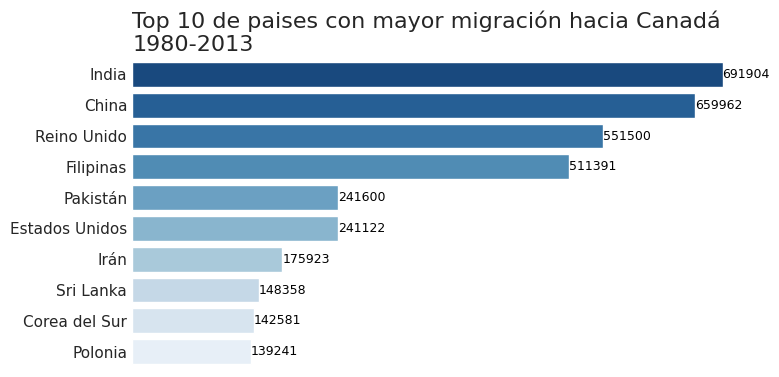

In [32]:
generar_grafico('Blues_r')


<ipython-input-31-2643fa42b547>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h',


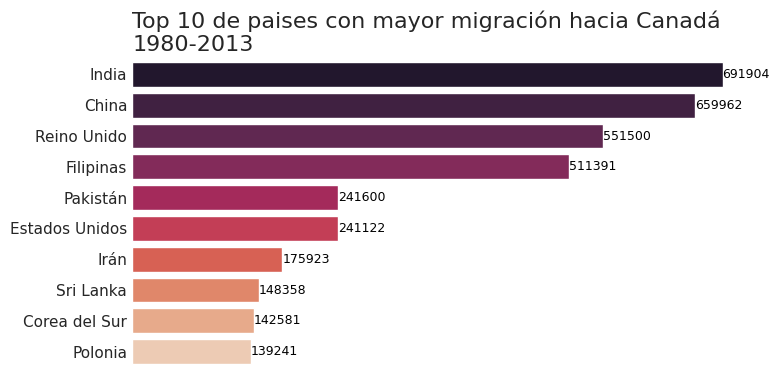

In [33]:
generar_grafico('rocket')

<ipython-input-31-2643fa42b547>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h',


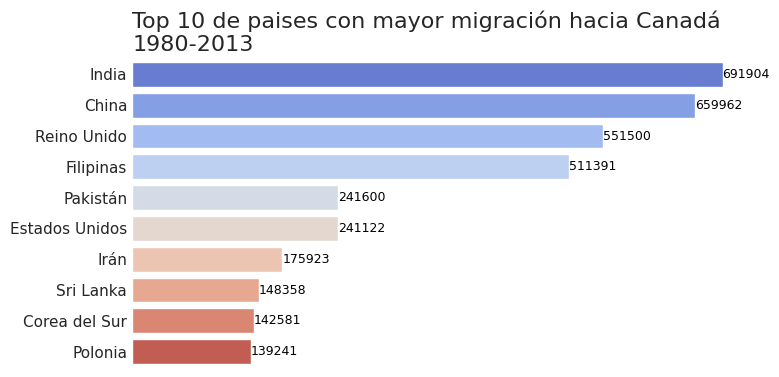

In [34]:
generar_grafico('coolwarm')

<ipython-input-31-2643fa42b547>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h',


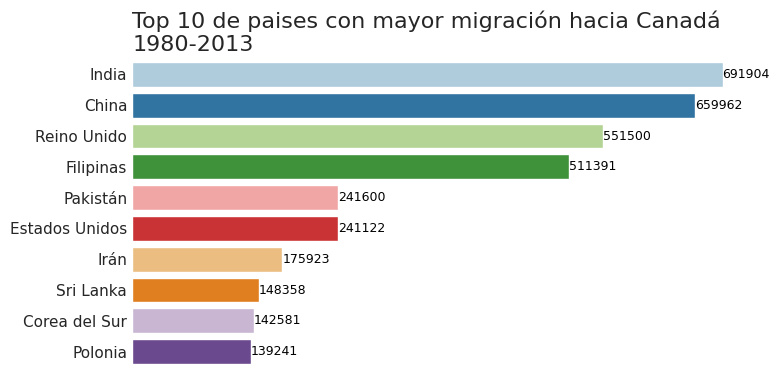

In [35]:
generar_grafico('Paired')

<ipython-input-31-2643fa42b547>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h',


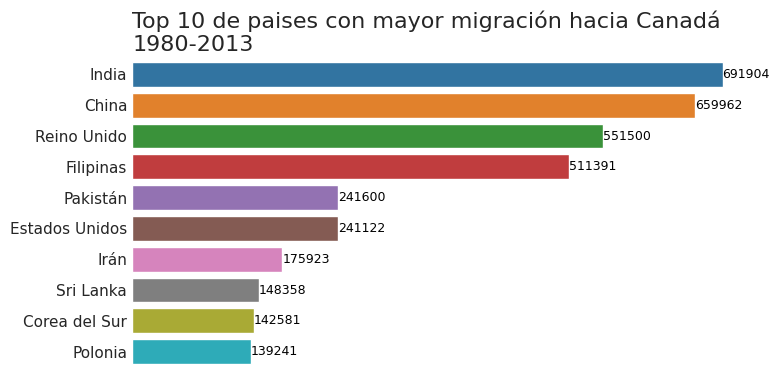

In [36]:
generar_grafico('tab10')

## 07 Explorando otros temas

In [37]:
# Vamos a eliminar algunas líneas de Matplotlib para que no se superongan con Seaborn
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8, 4))
  #--mejorando la gráfica ahora se hace con Seaborn (menos líneas de código)
  # ax.set_frame_on(False)
  # ax.xaxis.set_visible(False)
  # ax.tick_params(axis='y', which='both', size=0)
  ax.set(xticklabels=[]) # se agregó esta línea y se comentaron 5 líneas

  # ax.xaxis.set_visible(False)
  # ax.tick_params(axis='y', which='both', size=0)
  ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h',
                   palette=palette, legend=False) # se agregó esta línea
  ax.set_title('Top 10 de paises con mayor migración hacia Canadá\n1980-2013',
        loc='left', fontsize=16)
  ax.set_xlabel('Número de inmigrantes', fontsize=14)
  #ax.set_ylabel('Países', fontsize=14)
  ax.set_ylabel('')
  #----Se muestra en cada barra el valor total exacto de cada país
  sns.despine() # Saco primero todos los bordes del gráfico white

  for i,j in enumerate(top_10['Total']):
    ax.text(j, i, str(j), va='center', ha='left', color='black', fontsize=9)
  plt.show()

<ipython-input-37-6cfe30ac1510>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h',


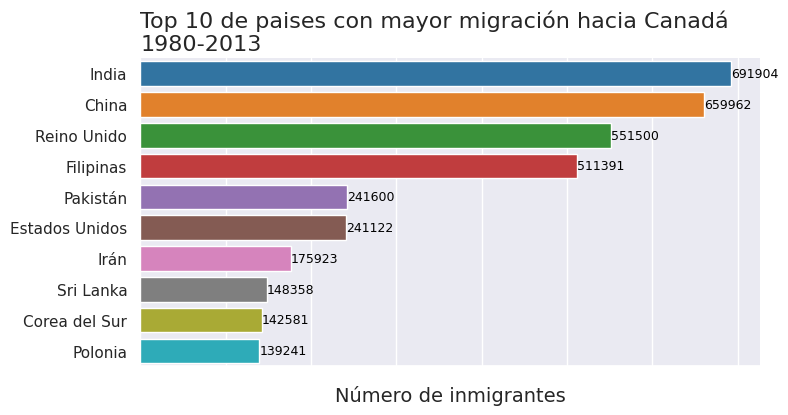

In [38]:
sns.set_theme()
generar_grafico('tab10')

<ipython-input-37-6cfe30ac1510>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h',


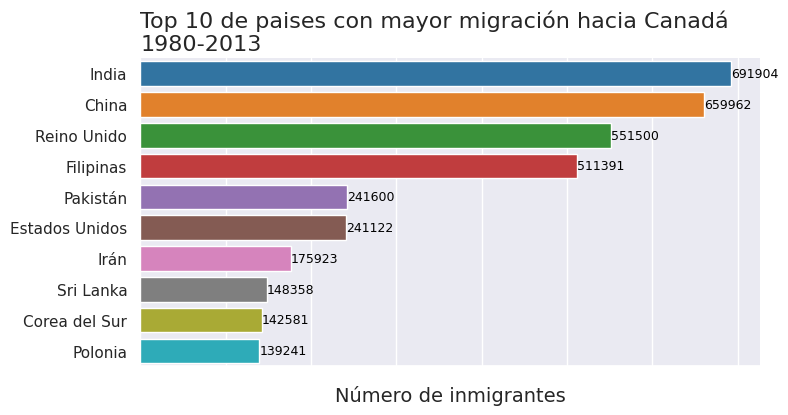

In [39]:
sns.set_theme(style='darkgrid')
generar_grafico('tab10')

<ipython-input-37-6cfe30ac1510>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h',


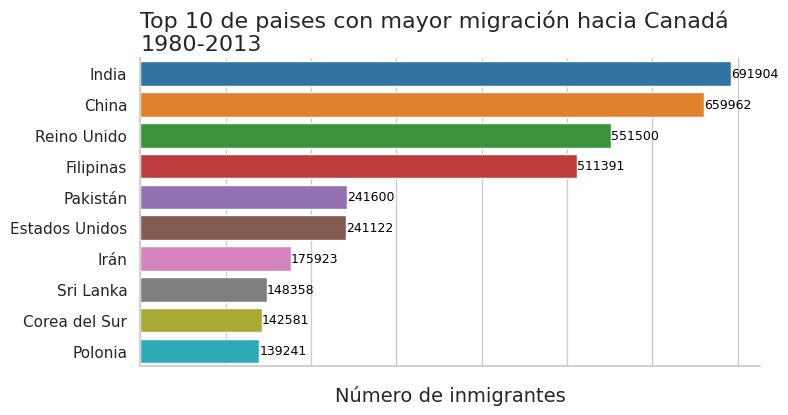

In [40]:
sns.set_theme(style='whitegrid')
generar_grafico('tab10')

<ipython-input-37-6cfe30ac1510>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total', y=top_10.index, data=top_10, orient='h',


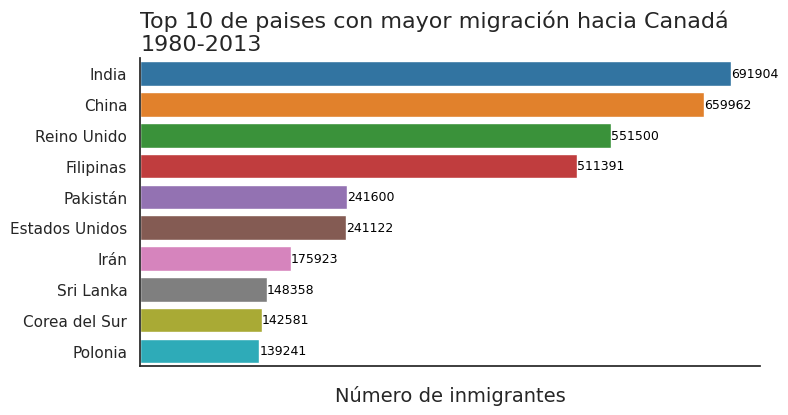

In [41]:
sns.set_theme(style='white') # modif también la función para que no se vea el recuadro
generar_grafico('tab10')

# 05. Gráficos interactivos con Plotly
https://plotly.com/python/

* 02 Creando nuestro primer gráfico interactivo

In [42]:
import plotly.express as px

##  03 Añadiendo rótulos y modificando fuentes

In [43]:
fig = px.line(df_colombia, x='Año', y='Cantidad')
fig.show()
#---Agregado interactivo
fig.update_layout(width=600, height=400, xaxis={'tickangle':-45}, title='Inmigrantes colombianos hacia Canadá entre 1980 y 2013',
                  font_family='Arial', font_size=14, font_color='gray')
fig.show()

##  05 Alterando colores con Plotly

In [44]:
 fig = px.line(df_colombia, x='Año', y='Cantidad', title='Inmigrantes de colombianos hacia Canadá entre 1980 y 2013')
#-- Agregado interactivo nuevo
fig.update_traces(line_color='green', line_width=2.5)

#---Agregado interactivo 2
fig.update_layout(width=600, height=400, xaxis={'tickangle':-45}, title='Inmigrantes colombianos hacia Canadá entre 1980 y 2013',
                  xaxis_title='Años', yaxis_title='Cantidad de inmigrantes',
                  font_family='Arial', font_size=14, font_color='gray')
fig.show()

In [45]:
sudamerica.head()

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina y el Caribe,América del Sur,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia,América Latina y el Caribe,América del Sur,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina y el Caribe,América del Sur,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina y el Caribe,América del Sur,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colombia,América Latina y el Caribe,América del Sur,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [46]:
sudamerica.drop(['Continente','Region', 'Total'], axis=1, inplace=True)
sudamerica.head()

<ipython-input-46-eb24839554ac>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282
Bolivia,44,52,42,49,38,44,79,165,63,68,...,85,134,139,107,143,214,180,86,83,107
Brasil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Chile,1233,1069,1078,781,681,533,633,1454,990,1023,...,383,384,427,530,350,375,340,174,291,273
Colombia,266,326,360,244,235,214,257,376,352,439,...,4566,6424,6535,5357,5452,4652,5218,4366,3741,3631


In [47]:
sudamerica_trans = sudamerica.T #Invierto columnas x filas y viceversa
sudamerica_trans.head()

Pais,Argentina,Bolivia,Brasil,Chile,Colombia,Ecuador,Guyana,Paraguay,Perú,Surinam,Uruguay,Venezuela
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124
1984,237,38,145,681,235,179,1932,48,306,5,90,142


In [51]:
fig = px.line(sudamerica_trans, x=sudamerica_trans.index, y=sudamerica_trans.columns,
              title='Inmigrantes de sudamericanos hacia Canadá entre 1980 y 2013',
              color='Pais', markers=True)
#-- Agregado interactivo nuevo
# fig.update_traces(line_color='green', line_width=2.5)

#---Agregado interactivo 2
fig.update_layout(width=1000, height=600, xaxis={'tickangle':-45}, title='Inmigrantes colombianos hacia Canadá entre 1980 y 2013',
                  xaxis_title='Años', yaxis_title='Cantidad de inmigrantes',
                  font_family='Arial', font_size=14, font_color='gray')
fig.show()

## 06 Exportando gráficos interactivos en HTML

In [52]:
 fig = px.line(sudamerica_trans, x=sudamerica_trans.index, y=sudamerica_trans.columns,
              title='Inmigrantes de sudamericanos hacia Canadá entre 1980 y 2013',
              color='Pais', markers=True)
#-- Agregado interactivo nuevo
# fig.update_traces(line_color='green', line_width=2.5)

#---Agregado interactivo 2
fig.update_layout(width=1000, height=600, xaxis={'tickangle':-45}, title='Inmigrantes colombianos hacia Canadá entre 1980 y 2013',
                  xaxis_title='Años', yaxis_title='Cantidad de inmigrantes',
                  font_family='Arial', font_size=14, font_color='gray')
fig.write_html('/content/inmigrantes_sudamericanos_canada.html')
fig.show()